【課題】教師なし学習とは何か記述せよ

・教師あり学習との比較

１、特徴量に対しラベルがなく、データ構造から何らかの意味ある情報を取り出そうとする学習の仕組み。

２、出力すべきものがあらかじめ決まっていない。


・どんなときに使うのか

１、特徴量削減等の前処理時。

２、クラスタリングしたい時。


・具体的にどんなものがあるのか

１、階層クラスタリング：クラスタツリーを作成して複数のレベルをもつ階層的なクラスタ群を構築する。

２、K平均法クラスタリング：クラスタの重心までの距離に基づいてK個の異なるクラスタに分割する。

３、混合ガウスモデル：多変量正規密度コンポーネントの混合としてクラスタをモデル化する。

４、自己組織化マップ：データのトポロジーと分布を学習するニューラルネットワークを使用する。

５、隠れマルコフモデル：状態の系列を観測データから復元するために利用する。

In [80]:
#【課題】必要なライブラリをimport
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

In [81]:
#【課題】csvファイルの読み込み
data = pd.read_csv('Wholesale customers data.csv')

In [82]:
#※データを眺める
print("サンプル数：{}  特徴量の数：{}\n".format(*data.shape))
print('各特徴量の型\n', data.dtypes, '\n')
print('統計量の要約')
display(data.describe())
display(data.head())

サンプル数：440  特徴量の数：8

各特徴量の型
 Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object 

統計量の要約


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [83]:
#【課題】不要な特徴量を消す
#元のデータはdata_originalに格納しておく
data_original = data.copy()

#dataからChannelとRegionの2列を削除するコードを記述
data = data.drop(['Channel','Region'],axis=1)

#消えていることを確認
display(data.head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c85f470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11cd24358>]], dtype=object)

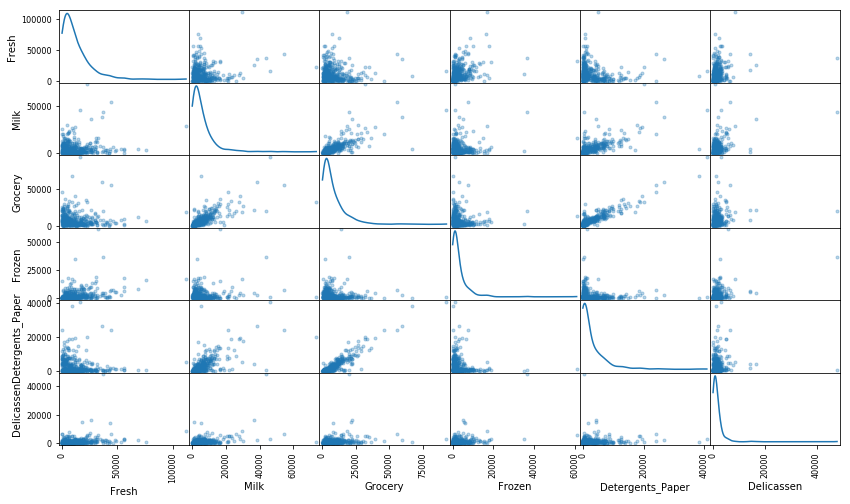

In [84]:
#※scatter matrixを描く
pd.scatter_matrix(data,alpha=0.3,figsize=(14,8),diagonal='kde')

In [85]:
#【課題】Feature Scalingの実行
#dataに対して適切なFeature Scalingを行うコードを記述
from sklearn.preprocessing import FunctionTransformer
FTF = FunctionTransformer(np.log)
data_fs = FTF.fit_transform(data)
data_fs = pd.DataFrame(data_fs)#numpyをDataFrameへ変換

In [86]:
data_fs.columns = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b651080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e4f25c0>]], dtype=object)

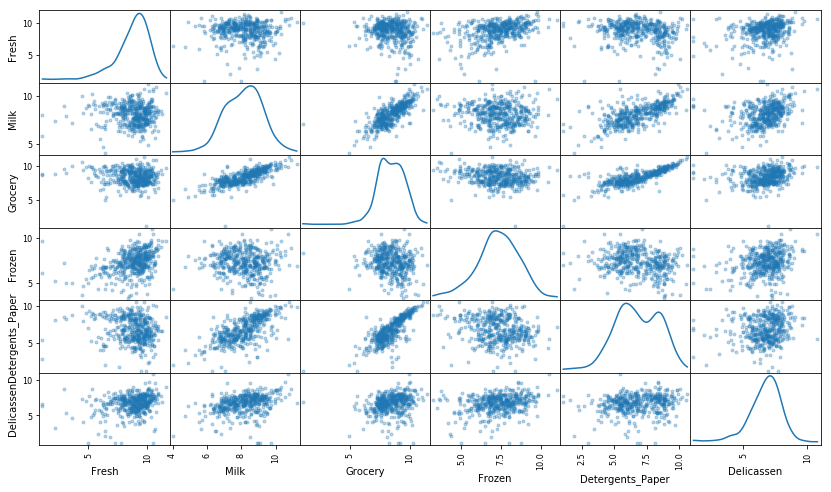

In [87]:
pd.scatter_matrix(data_fs, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

【課題】なぜFeature Scalingが必要なのか記述せよ

答え：違うスケールの特徴量を同じものさしで測ると、絶対値の大きな特徴量や、外れ値の大きな特徴量に大きく影響を受けてしまうため。

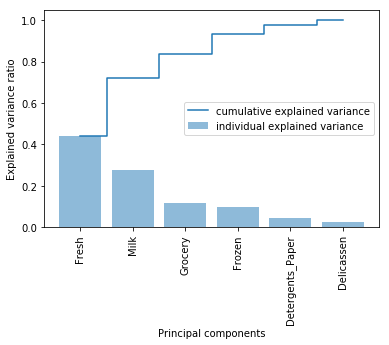

,Fresh,Milk
0,9.446913,9.175335
1,8.861775,9.191158
2,8.756682,9.083416
3,9.492884,7.086738
4,10.026369,8.596004


In [88]:
#【課題】PCAの実行
#data_fsに対しPCAを行い分散説明率の累積を確認
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
data_pca_fs = pca.fit_transform(data_fs)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,7),var_exp,alpha=0.5,align='center',label='individual explained variance')
plt.step(range(1,7),cum_var_exp,where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.xticks(range(1,7),label,rotation=90)
plt.show()

#分散説明率が70%を超える数の主成分を選び、data_pcaに格納する
data_pca = data_fs.drop(['Grocery','Frozen','Detergents_Paper','Delicassen'],axis=1)
data_pca.head()

【課題】なぜPCAを行うのか記述せよ

答え：次元の呪い（過学習）対策や計算量の削減を行うため。

【課題】クラスタリングとは何か記述せよ

・いつ何に使うのか

雑多なデータがあり、且つその分け方も存在しない際に、それらをグループ分けするために使う。

・階層的手法と非階層的手法との違い

階層的手法はサンプル間の距離を扱いクラスタ分けしていくことに対し、非階層的手法ではクラスタ内誤差平方和（SSE）が最適になるような分割を行う。また階層的手法は初期値としてクラスタ数を指定する必要がない一方、非階層的手法ではクラスタ数を指定する必要がある。

・クラス分類（classification）との比較

クラス分類は分け方が事前に決まっていて、それに基づき分類していくことで、クラスタリングは事前に分類方法は決まっておらず、データを見てうまい具合に分類する。

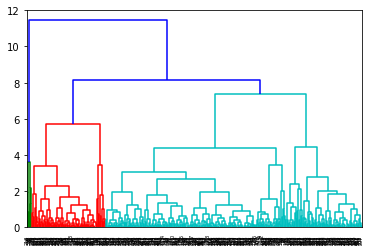

In [94]:
#【課題】樹状図を描く
#樹状図を描くコードを記述
from scipy.spatial.distance import pdist,squareform
#pdist:サンプル間のすべての距離を求める関数
#squareform:それを表にまとめて出力する関数
#row_dist = pd.DataFrame(squareform(pdist(data_fs,metric='euclidean')))

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
row_clusters = linkage(pdist(data_pca,metric='euclidean'),method='complete')
row_dender = dendrogram(row_clusters)
plt.show()

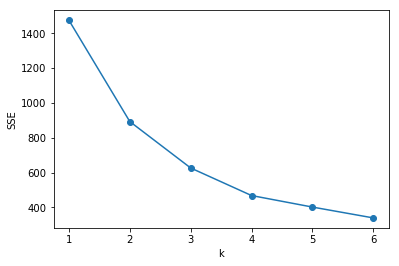

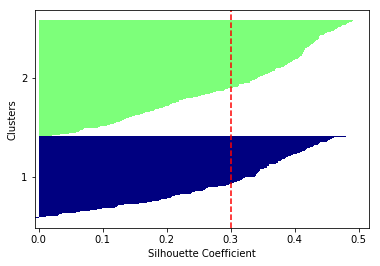

In [104]:
#【課題】k-meansにおけるkの値の検討
#クラスタ数を検討するためのコードを記述
#エルボー法
from sklearn.cluster import KMeans
SSE = []
for i in range(1,7):
    km  = KMeans(n_clusters=i,init='random',n_init=10,max_iter=300,random_state=0)
    km.fit(data_pca)
    SSE.append(km.inertia_)
    #n_init:KMeansを繰り返す回数
plt.plot(range(1,7),SSE,marker='o')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

#シルエット分析
km = KMeans(n_clusters=2,init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=0)
data_fs_km = km.fit_predict(data_fs)
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(data_fs_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(data_fs,data_fs_km,metric='euclidean')
data_fs_lower,data_fs_upper = 0,0
yticks = []
for i,c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[data_fs_km == c]
    c_silhouette_vals.sort()
    data_fs_upper += len(c_silhouette_vals)
    color = cm.jet(i/n_clusters)
    plt.barh(range(data_fs_lower,data_fs_upper),c_silhouette_vals,height=1,edgecolor='none',color=color)
    yticks.append((data_fs_lower + data_fs_upper) / 2)
    data_fs_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color='red',linestyle='--')
plt.yticks(yticks,cluster_labels + 1)
plt.ylabel('Clusters')
plt.xlabel('Silhouette Coefficient')
plt.show()

#k=2
#理由：dendrogramだと2クラスタがうまく分かれていて、SSEだと３以下が妥当そうで、
#シルエット図だと2が比較的うまく分かれているので、総合的に見て2クラスタが良い。

In [97]:
#【課題】k-meansの実行
##k-meansを行うコードを記述
km = KMeans(n_clusters=2,init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=0)

In [105]:
#【課題】クラスタリングの可視化
y_km = km.fit_predict(data_pca)
y_km

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1,

In [109]:
plt.scatter(data_pca[y_km==0,0],data_pca[y_km==0,1],s=50,marker='s',label='cluster 1')
# plt.scatter(data_fs[km=1,0],data_fs[km=1,1],marker='o',label='cluster 2')
# plt.scatter(data_fs[km=2,0],data_fs[km=2,1],marker='v',label='cluster 3')


TypeError: unhashable type: 'numpy.ndarray'